# Implement a solution for a Constraint Satisfaction Problem using Branch and Bound and
# Backtracking for n-queens problem or a graph coloring problem.

# Practical No. 4

Enter the value of N (size of the chessboard):  4


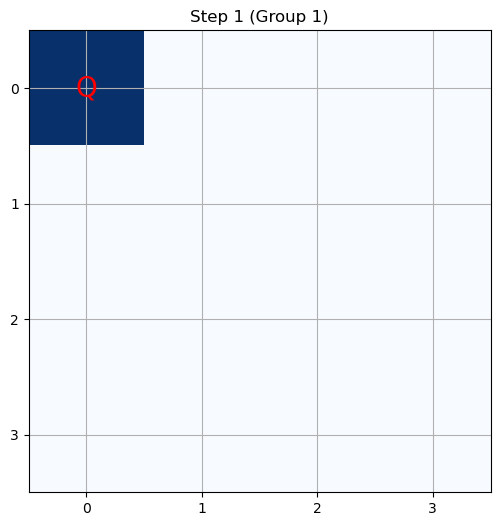

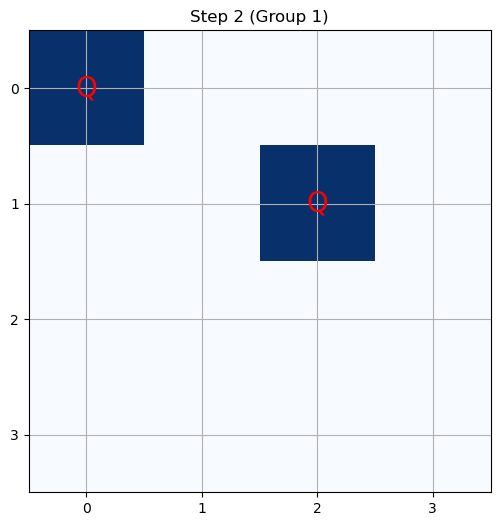

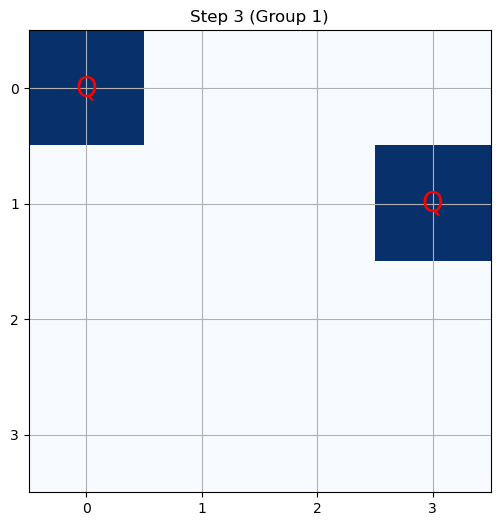

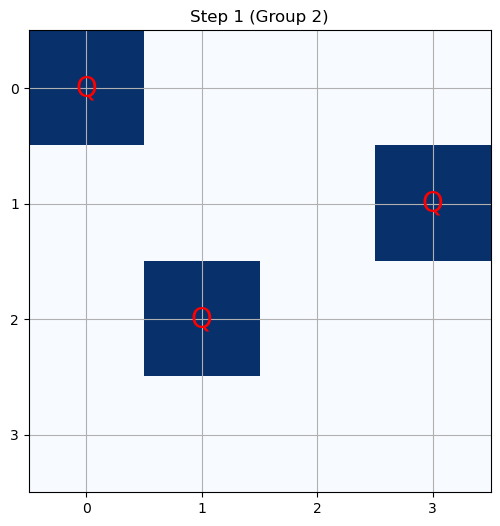

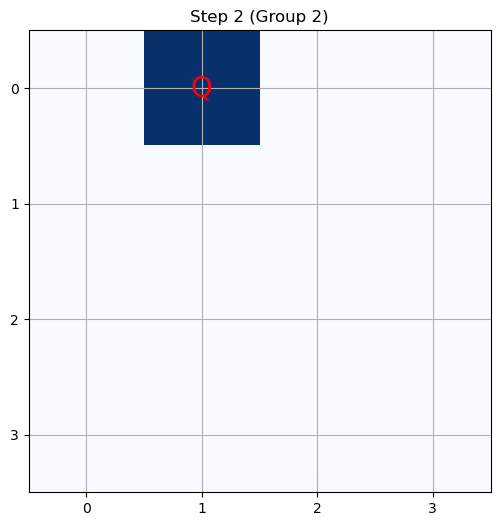

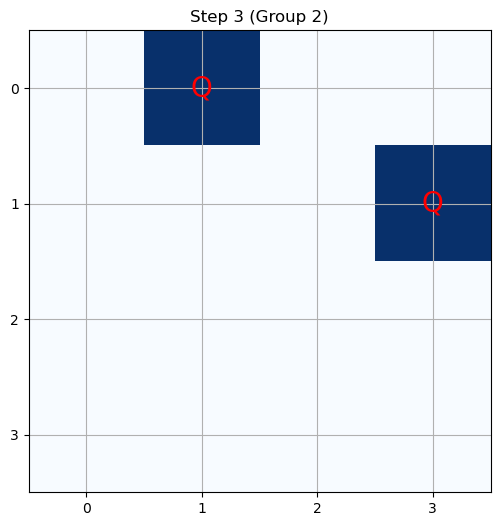

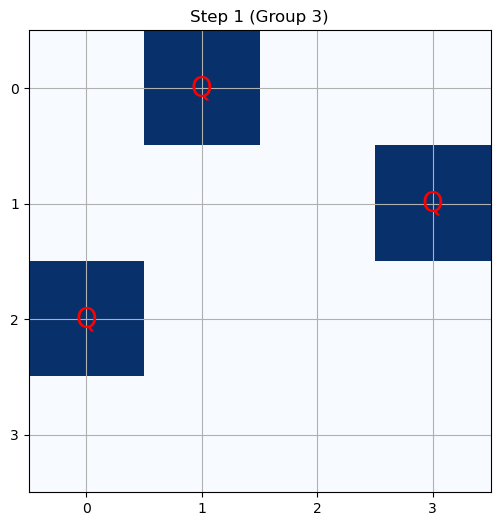

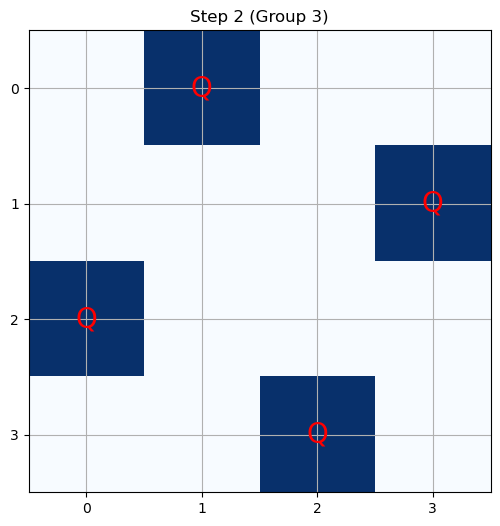

Final solution for 4-Queens Problem:


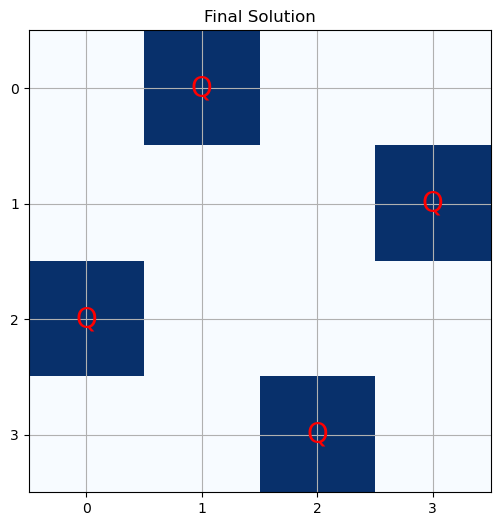

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class NQueensBacktracking:
    def __init__(self, N):
        self.N = N
        self.board = [-1] * N
        self.solutions = []
        self.step_counter = 1
        self.group_counter = 1

    def print_board(self):
        board_copy = np.zeros((self.N, self.N), dtype=int)
        for row in range(self.N):
            if self.board[row] != -1:
                board_copy[row, self.board[row]] = 1
        return board_copy

    def is_safe(self, row, col):
        for i in range(row):
            if self.board[i] == col or \
               self.board[i] - i == col - row or \
               self.board[i] + i == col + row:
                return False
        return True

    def solve_nq_util(self, row):
        if row == self.N:
            self.solutions.append(self.board.copy())
            return True

        for col in range(self.N):
            if self.is_safe(row, col):
                self.board[row] = col
                self.show_step()
                if self.solve_nq_util(row + 1):
                    return True
                self.board[row] = -1
        return False

    def show_step(self):
        board_state = self.print_board()
        plt.figure(figsize=(6, 6))
        plt.imshow(board_state, cmap='Blues', interpolation='none')
        plt.title(f"Step {self.step_counter} (Group {self.group_counter})")
        plt.xticks(range(self.N))
        plt.yticks(range(self.N))
        plt.grid(True)
        for i in range(self.N):
            for j in range(self.N):
                if board_state[i, j] == 1:
                    plt.text(j, i, "Q", color="red", fontsize=20, ha='center', va='center')
        plt.show()

        self.step_counter += 1
        if (self.step_counter - 1) % 3 == 0:
            self.group_counter += 1
            self.step_counter = 1

    def solve_nq(self):
        if not self.solve_nq_util(0):
            print("Solution does not exist")
            return
        print(f"Final solution for {self.N}-Queens Problem:")
        self.show_solution()

    def show_solution(self):
        final_board = self.print_board()
        plt.figure(figsize=(6, 6))
        plt.imshow(final_board, cmap='Blues', interpolation='none')
        plt.title(f"Final Solution")
        plt.xticks(range(self.N))
        plt.yticks(range(self.N))
        plt.grid(True)
        for i in range(self.N):
            for j in range(self.N):
                if final_board[i, j] == 1:
                    plt.text(j, i, "Q", color="red", fontsize=20, ha='center', va='center')
        plt.show()

# Take user input for N
try:
    N = int(input("Enter the value of N (size of the chessboard): "))
    if N < 1:
        print("Please enter a positive integer for N.")
    else:
        n_queens = NQueensBacktracking(N)
        n_queens.solve_nq()
except ValueError:
    print("Invalid input! Please enter an integer.")


Enter the number of edges:  5
Enter an edge in the format 'node1 node2':  0 1
Enter an edge in the format 'node1 node2':  0 2
Enter an edge in the format 'node1 node2':  1 2
Enter an edge in the format 'node1 node2':  2 3
Enter an edge in the format 'node1 node2':  3 4
Enter the number of colors to be used for coloring the graph:  3


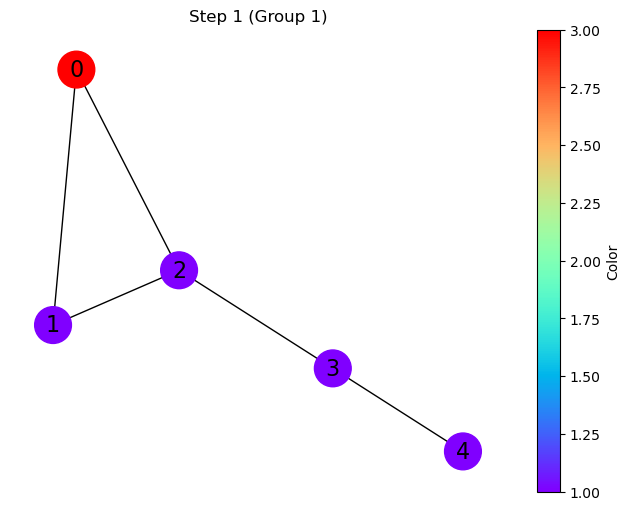

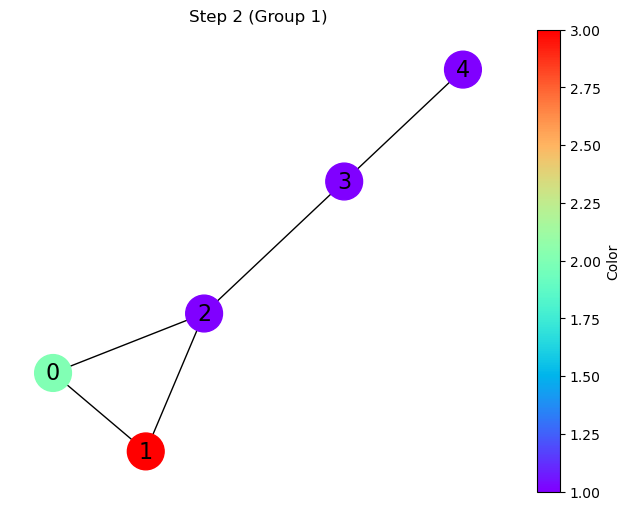

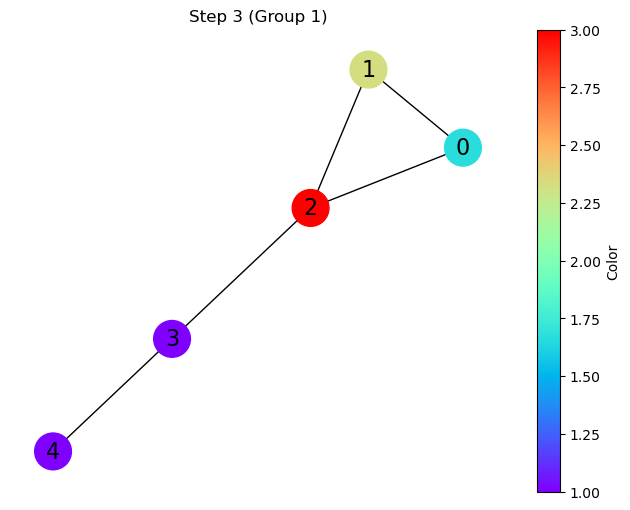

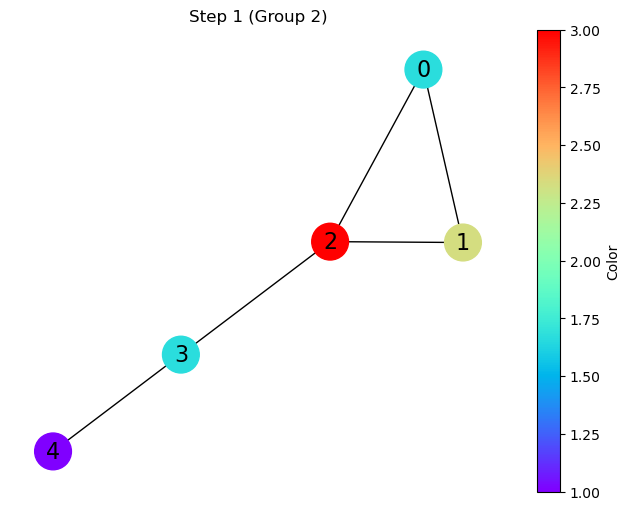

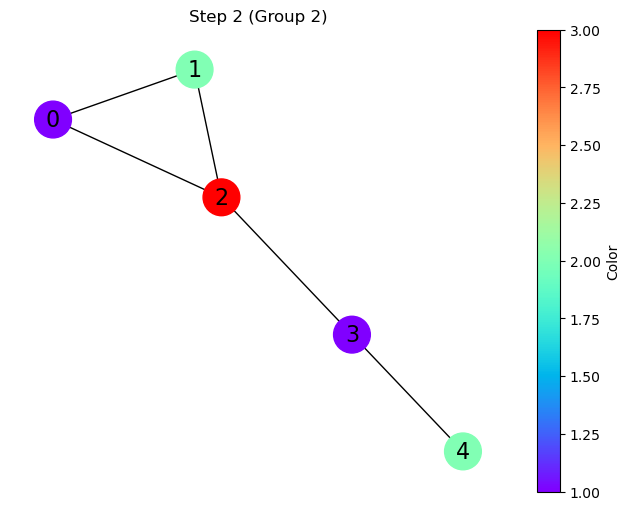

Found solution for Graph Coloring Problem:


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

class GraphColoringBacktracking:
    def __init__(self, graph, num_colors):
        self.graph = graph
        self.num_colors = num_colors
        self.node_colors = {node: None for node in graph.nodes}
        self.step_counter = 1
        self.group_counter = 1

    def is_safe(self, node, color):
        for neighbor in self.graph.neighbors(node):
            if self.node_colors[neighbor] == color:
                return False
        return True

    def solve_graph_coloring_util(self, node_index):
        if node_index == len(self.graph.nodes):
            return True

        node = list(self.graph.nodes)[node_index]

        for color in range(1, self.num_colors + 1):
            if self.is_safe(node, color):
                self.node_colors[node] = color
                self.show_step_by_step_solution()
                if self.solve_graph_coloring_util(node_index + 1):
                    return True
                self.node_colors[node] = None

        return False

    def show_step_by_step_solution(self):
        self.visualize_graph()
        self.step_counter += 1
        if self.step_counter > 3:
            self.step_counter = 1
            self.group_counter += 1

    def visualize_graph(self):
        G = self.graph
        node_colors = [self.node_colors[node] if self.node_colors[node] is not None else 0 for node in G.nodes]

        fig, ax = plt.subplots(figsize=(8, 6))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.rainbow, node_size=700, font_size=16, ax=ax)

        sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=1, vmax=self.num_colors))
        sm.set_array([])
        plt.colorbar(sm, ax=ax, label="Color")

        plt.title(f"Step {self.step_counter} (Group {self.group_counter})")
        plt.show()

    def solve_graph_coloring(self):
        if not self.solve_graph_coloring_util(0):
            print("Solution does not exist")
            return
        print(f"Found solution for Graph Coloring Problem:")

# Main code to take user input
if __name__ == "__main__":
    # Take user input for the number of edges
    try:
        num_edges = int(input("Enter the number of edges: "))
        edges = []

        # Taking input for each edge
        for _ in range(num_edges):
            edge = input("Enter an edge in the format 'node1 node2': ")
            u, v = map(int, edge.split())
            edges.append((u, v))

        # Create the graph and add edges
        graph = nx.Graph()
        graph.add_edges_from(edges)

        # Take user input for the number of colors
        num_colors = int(input("Enter the number of colors to be used for coloring the graph: "))

        # Create an instance of the GraphColoringBacktracking class
        graph_coloring = GraphColoringBacktracking(graph, num_colors)

        # Solve the graph coloring problem
        graph_coloring.solve_graph_coloring()

    except ValueError:
        print("Invalid input! Please enter integers only.")


Enter the value of N (size of the chessboard):  3


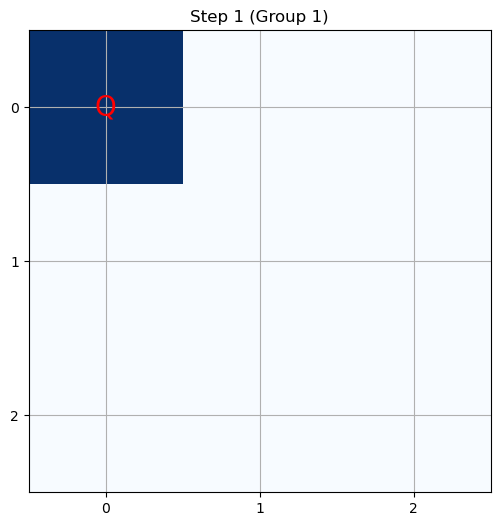

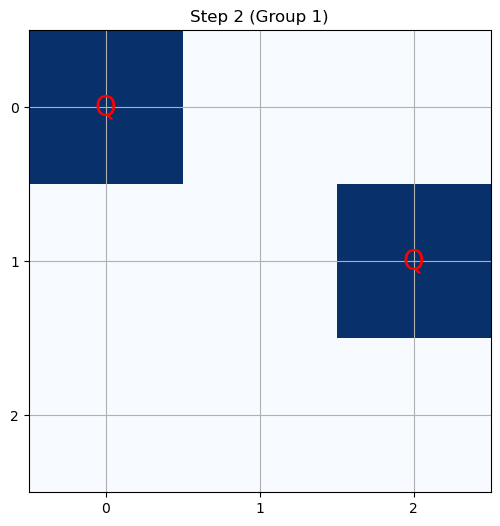

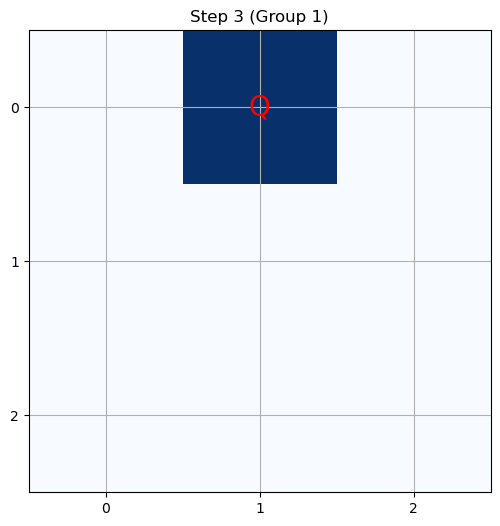

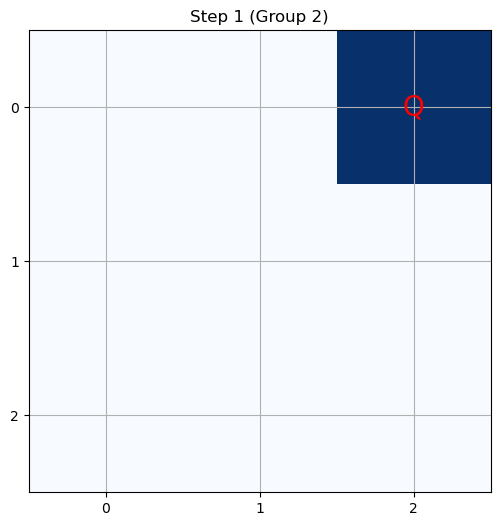

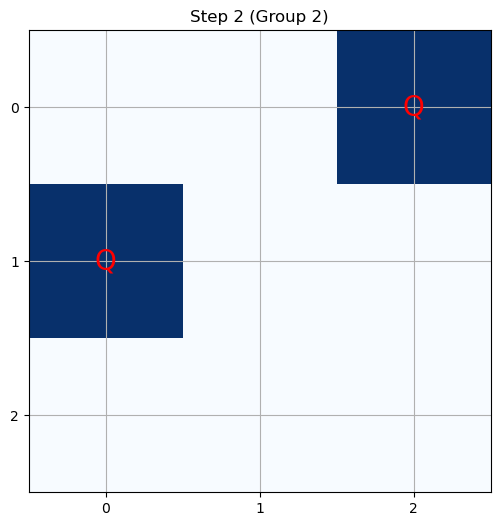

Solution does not exist


In [1]:
import matplotlib.pyplot as plt
import numpy as np

class NQueensBacktracking:
    def __init__(self, N):
        self.N = N
        self.board = [-1] * N
        self.solutions = []
        self.step_counter = 1
        self.group_counter = 1

    def print_board(self):
        board_copy = np.zeros((self.N, self.N), dtype=int)
        for row in range(self.N):
            if self.board[row] != -1:
                board_copy[row, self.board[row]] = 1
        return board_copy

    def is_safe(self, row, col):
        for i in range(row):
            if self.board[i] == col or \
               self.board[i] - i == col - row or \
               self.board[i] + i == col + row:
                return False
        return True

    def solve_nq_util(self, row):
        if row == self.N:
            self.solutions.append(self.board.copy())
            return True

        for col in range(self.N):
            if self.is_safe(row, col):
                self.board[row] = col
                self.show_step()
                if self.solve_nq_util(row + 1):
                    return True
                self.board[row] = -1
        return False

    def show_step(self):
        board_state = self.print_board()
        plt.figure(figsize=(6, 6))
        plt.imshow(board_state, cmap='Blues', interpolation='none')
        plt.title(f"Step {self.step_counter} (Group {self.group_counter})")
        plt.xticks(range(self.N))
        plt.yticks(range(self.N))
        plt.grid(True)
        for i in range(self.N):
            for j in range(self.N):
                if board_state[i, j] == 1:
                    plt.text(j, i, "Q", color="red", fontsize=20, ha='center', va='center')
        plt.show()

        self.step_counter += 1
        if (self.step_counter - 1) % 3 == 0:
            self.group_counter += 1
            self.step_counter = 1

    def solve_nq(self):
        if not self.solve_nq_util(0):
            print("Solution does not exist")
            return
        print(f"Final solution for {self.N}-Queens Problem:")
        self.show_solution()

    def show_solution(self):
        final_board = self.print_board()
        plt.figure(figsize=(6, 6))
        plt.imshow(final_board, cmap='Blues', interpolation='none')
        plt.title(f"Final Solution")
        plt.xticks(range(self.N))
        plt.yticks(range(self.N))
        plt.grid(True)
        for i in range(self.N):
            for j in range(self.N):
                if final_board[i, j] == 1:
                    plt.text(j, i, "Q", color="red", fontsize=20, ha='center', va='center')
        plt.show()

# Take user input for N
try:
    N = int(input("Enter the value of N (size of the chessboard): "))
    if N < 1:
        print("Please enter a positive integer for N.")
    else:
        n_queens = NQueensBacktracking(N)
        n_queens.solve_nq()
except ValueError:
    print("Invalid input! Please enter an integer.")


Enter the number of edges:  6
Enter an edge in the format 'node1 node2':  0 1
Enter an edge in the format 'node1 node2':  1 2
Enter an edge in the format 'node1 node2':  2 3
Enter an edge in the format 'node1 node2':  3 4 
Enter an edge in the format 'node1 node2':  4 5
Enter an edge in the format 'node1 node2':  5 6
Enter the number of colors to be used for coloring the graph:  6


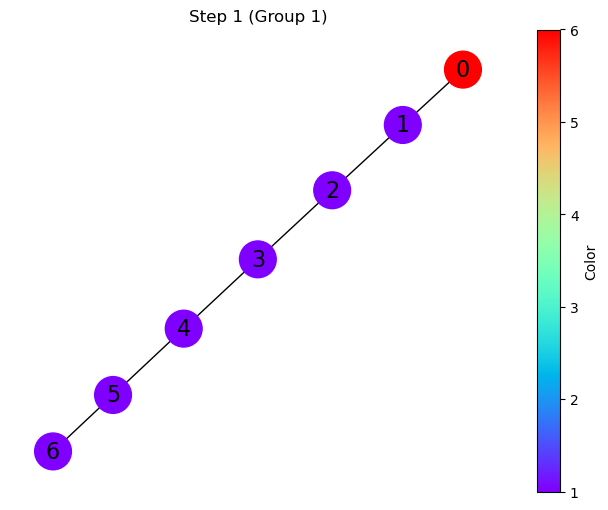

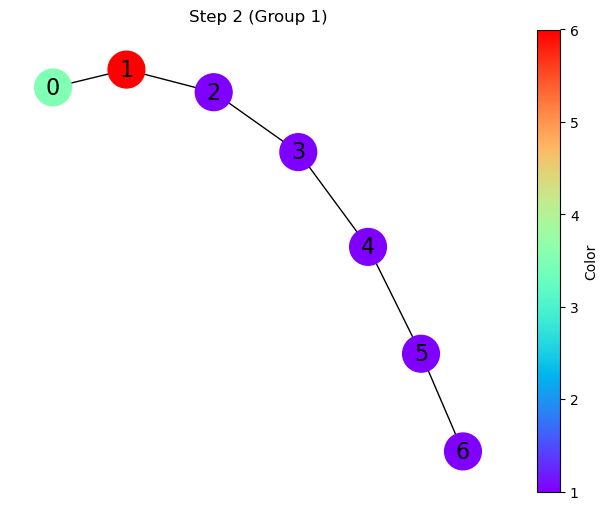

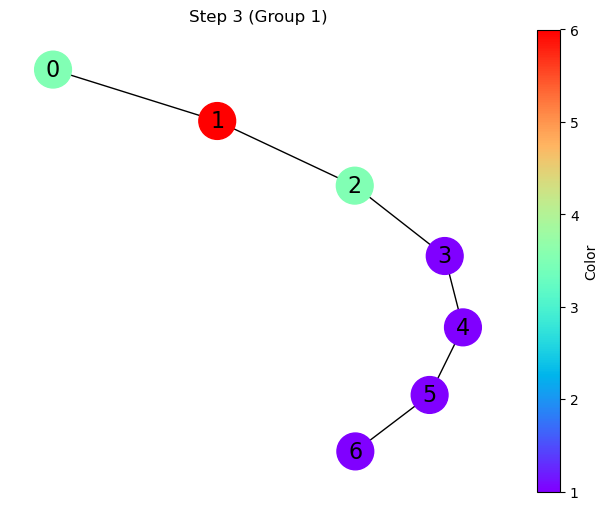

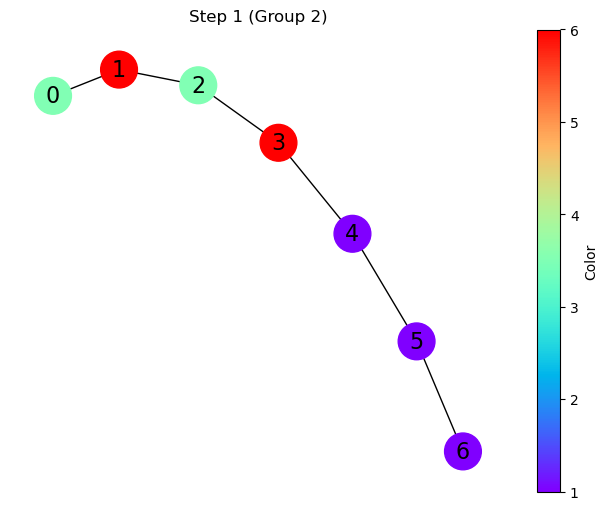

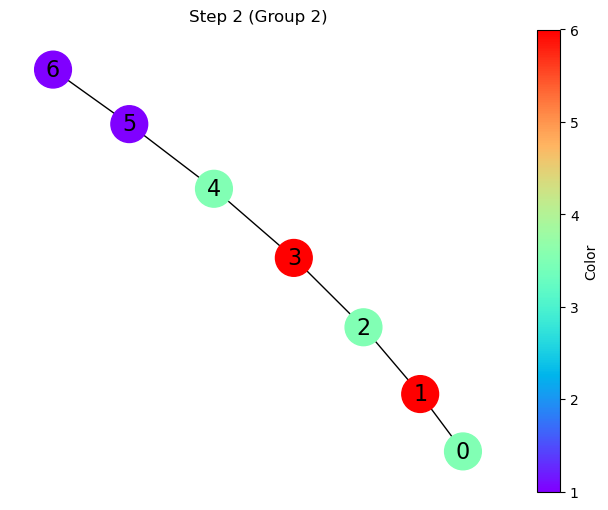

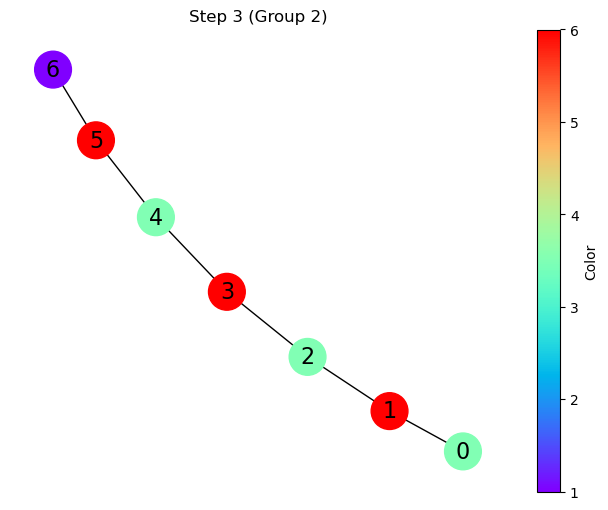

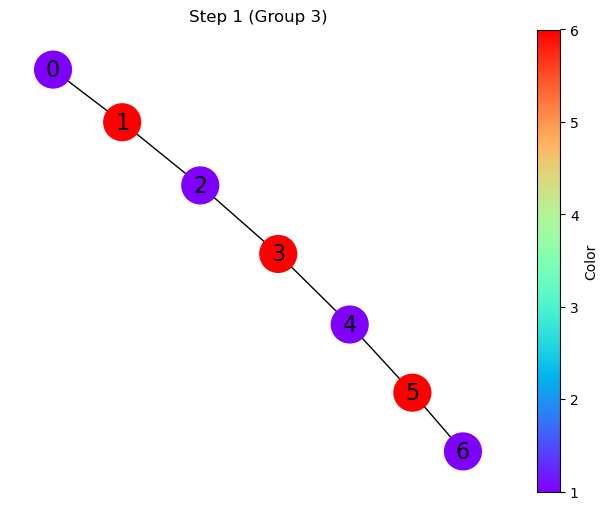

Found solution for Graph Coloring Problem:


In [6]:
## import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

class GraphColoringBacktracking:
    def __init__(self, graph, num_colors):
        self.graph = graph
        self.num_colors = num_colors
        self.node_colors = {node: None for node in graph.nodes}
        self.step_counter = 1
        self.group_counter = 1

    def is_safe(self, node, color):
        for neighbor in self.graph.neighbors(node):
            if self.node_colors[neighbor] == color:
                return False
        return True

    def solve_graph_coloring_util(self, node_index):
        if node_index == len(self.graph.nodes):
            return True

        node = list(self.graph.nodes)[node_index]

        for color in range(1, self.num_colors + 1):
            if self.is_safe(node, color):
                self.node_colors[node] = color
                self.show_step_by_step_solution()
                if self.solve_graph_coloring_util(node_index + 1):
                    return True
                self.node_colors[node] = None

        return False

    def show_step_by_step_solution(self):
        self.visualize_graph()
        self.step_counter += 1
        if self.step_counter > 3:
            self.step_counter = 1
            self.group_counter += 1

    def visualize_graph(self):
        G = self.graph
        node_colors = [self.node_colors[node] if self.node_colors[node] is not None else 0 for node in G.nodes]

        fig, ax = plt.subplots(figsize=(8, 6))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.rainbow, node_size=700, font_size=16, ax=ax)

        sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=1, vmax=self.num_colors))
        sm.set_array([])
        plt.colorbar(sm, ax=ax, label="Color")

        plt.title(f"Step {self.step_counter} (Group {self.group_counter})")
        plt.show()

    def solve_graph_coloring(self):
        if not self.solve_graph_coloring_util(0):
            print("Solution does not exist")
            return
        print(f"Found solution for Graph Coloring Problem:")

# Main code to take user input
if __name__ == "__main__":
    # Take user input for the number of edges
    try:
        num_edges = int(input("Enter the number of edges: "))
        edges = []

        # Taking input for each edge
        for _ in range(num_edges):
            edge = input("Enter an edge in the format 'node1 node2': ")
            u, v = map(int, edge.split())
            edges.append((u, v))

        # Create the graph and add edges
        graph = nx.Graph()
        graph.add_edges_from(edges)

        # Take user input for the number of colors
        num_colors = int(input("Enter the number of colors to be used for coloring the graph: "))

        # Create an instance of the GraphColoringBacktracking class
        graph_coloring = GraphColoringBacktracking(graph, num_colors)

        # Solve the graph coloring problem
        graph_coloring.solve_graph_coloring()

    except ValueError:
        print("Invalid input! Please enter integers only.")
